- Author   -  Saurav vara prasad Channuri

- Roll No -  ES16BTECH11007

- cross - correlation










In [0]:
import numpy as np
import scipy.misc as sp
from skimage import io
from scipy import ndimage as nd
import matplotlib
import scipy
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from PIL import Image

In [0]:
real_image = io.imread("u2cuba.jpg")
screenshot = io.imread("trailer.png")

real_image_grey = io.imread('u2cuba.jpg', as_gray=True)
screenshot_grey = io.imread('trailerSlightlyBigger.png', as_gray=True)

real_image1 = io.imread("u2cuba.jpg")
screenshot1 = io.imread("trailer.png")

real_image_grey1 = io.imread('u2cuba.jpg', as_gray=True)
screenshot_grey1 = io.imread('trailer.png', as_gray=True)

In [123]:
fillter = np.empty([3,3,screenshot.shape[2]])
print "real image shape = ", real_image.shape
print "screenshot shape = ", screenshot.shape

real image shape =  (1063, 1250, 3)
screenshot shape =  (21, 22, 3)


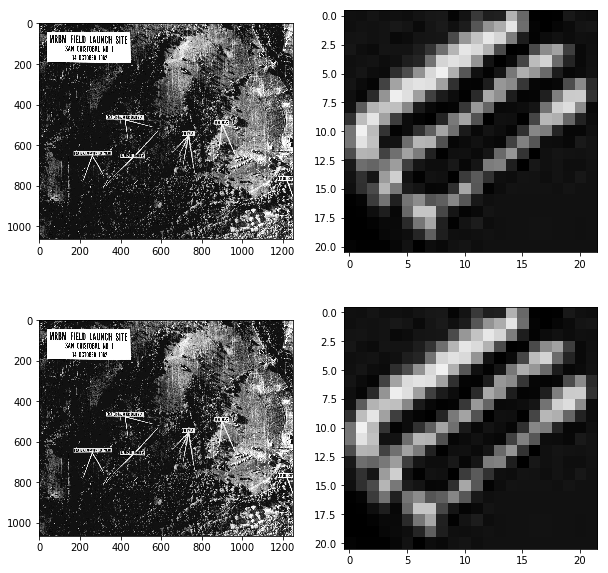

In [124]:
f, axarr = plt.subplots(2,2)
axarr[0][0].imshow(real_image)
axarr[0][1].imshow(screenshot)

axarr[1][0].imshow(real_image1)
axarr[1][1].imshow(screenshot1)

scipy.signal.correlate2d(real_image_grey, screenshot_grey, mode='same')

In [0]:
def pad( image, template ):
    
    
    top = image[0]
    top = np.tile(top, (template.shape[0]/2, 1))
    image = np.vstack((top, image)) # top padding
    
    bottom = image[-1]
    bottom = np.tile(bottom,(template.shape[0]/2, 1))
    image = np.vstack((image, top)) # Botton padding
    
    
    left = image.T[0]
    left = np.tile(left, (template.shape[1]/2, 1))
    image = np.vstack((left, image.T)).T   # left padding
    
    right = image.T[-1]
    right = np.tile(right, (template.shape[1]/2, 1))
    image = np.vstack((image.T, right)).T  # right padding
    
    return image
    
    

In [0]:
def plot(image, template, corr_output, corr):
  
  real_image_grey = image
  screenshot_grey = template
  
  
  # for adjusting the display figure size
  matplotlib.rcParams['figure.figsize'] = [10, 10]
  matplotlib.rcParams.update({'font.size': 10})

  # plotting images in a grid
  y, x = np.unravel_index(np.argmax(corr_output), corr.shape) 

  fig, ([[ax_orig, ax_template], [ax_corr, ax_corr_norm]]) = plt.subplots(2, 2)

  # plotting real image
  ax_orig.imshow(real_image_grey, cmap='gray')
  ax_orig.set_title('Original')
  ax_orig.set_axis_off()

  # plotting correlation output
  ax_template.imshow(screenshot_grey, cmap='gray')
  ax_template.set_title('template')
  ax_template.set_axis_off()

  #plotting the edges to show that correlation is working
  ax_corr.imshow(corr, cmap='gray')
  ax_corr.set_title('cross correlation without normalization')
  ax_corr.set_axis_off()

  #plotting cross correlation output with normalization
  ax_corr_norm.imshow(corr_output, cmap='gray')
  ax_corr_norm.set_title('cross correlation output with normalization')
  ax_corr_norm.set_axis_off()

  ax_orig.plot(x, y, 'ro', linewidth = 100)
  ax_corr.plot(x, y, 'ro', linewidth = 100)
  ax_corr_norm.plot(x, y, 'ro', linewidth = 100)

  fig.show()

In [0]:
def cross_correlation_without_normalization(image, template):
  real_image_grey = image
  screenshot_grey = template
  
  fillter = screenshot_grey - screenshot_grey.mean()
  padded = pad(real_image_grey, screenshot_grey)
  corr_output = np.empty(real_image_grey.shape)

  for i in range(real_image_grey.shape[0]):
      for j in range(real_image_grey.shape[1]):
          temp_matrix = padded[i:i+fillter.shape[0] , j:j+fillter.shape[1]]

          # Normalization part of cross correlation
#           row_sums = temp_matrix.sum(axis=1)
#           temp_matrix = temp_matrix / row_sums[:, np.newaxis]

          corr_output[i][j] = np.sum(fillter*temp_matrix)
  
  return corr_output

In [0]:
def cross_correlation_normalization(image, template):
  real_image_grey = image
  screenshot_grey = template
  
  fillter = screenshot_grey - screenshot_grey.mean()
  padded = pad(real_image_grey, screenshot_grey)
  corr_output = np.empty(real_image_grey.shape)

  for i in range(real_image_grey.shape[0]):
      for j in range(real_image_grey.shape[1]):
          temp_matrix = padded[i:i+fillter.shape[0] , j:j+fillter.shape[1]]

          # Normalization part of cross correlation
          row_sums = temp_matrix.sum(axis=1)
          temp_matrix = temp_matrix / row_sums[:, np.newaxis]

          corr_output[i][j] = np.sum(fillter*temp_matrix)
          

  return corr_output

In [0]:
def cross_correlation(image, template):
  
  corr_output = cross_correlation_normalization(image, template)
  print "correlation with normaliation done \n"
  
  corr        = cross_correlation_without_normalization(image,template)
  print "correlation without normalization done \n"
  
  plot(image, template, corr_output, corr)
  print "plots done"
  print "____________________________________________________________\n"
  

correlation with normaliation done 

correlation without normalization done 

plots done
____________________________________________________________

correlation with normaliation done 

correlation without normalization done 

plots done
____________________________________________________________



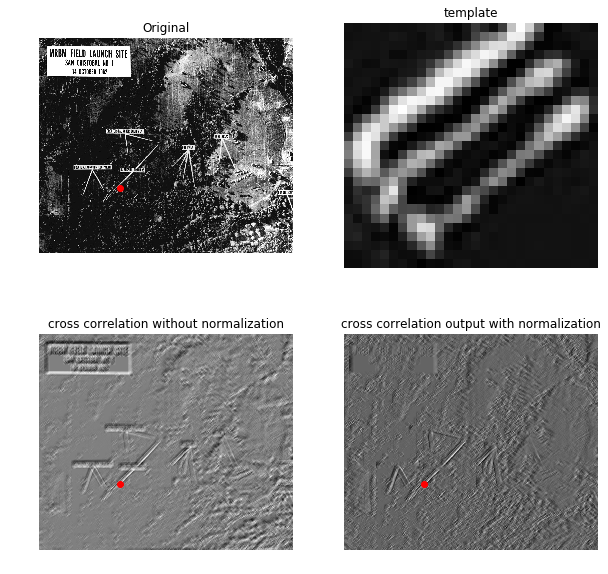

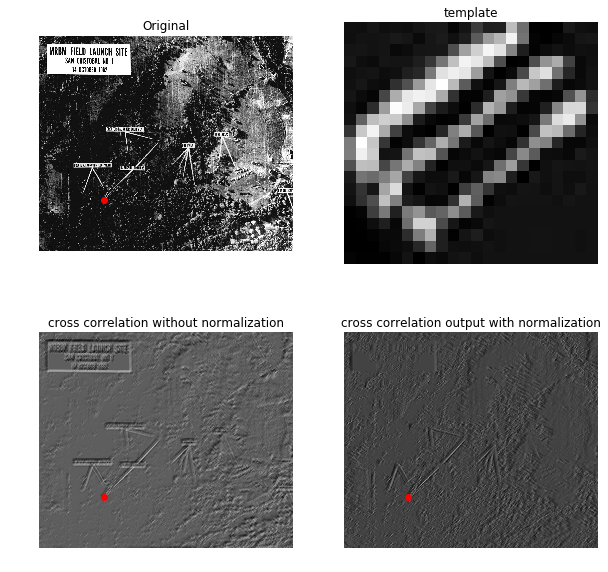

In [125]:
cross_correlation(real_image_grey, screenshot_grey)
cross_correlation(real_image_grey1, screenshot_grey1)